# EXERCÍCIO 6: Agrupamento de dados

### Objetivos

Neste Notebook apresentaremos o agrupamento de dados (Clustering).

Analisaremos novamente a criação de dados artificiais, e utilizaremos a métrica NMIS para encontrar nossa melhor classificação, pois ela também compensa contra o overfitting.

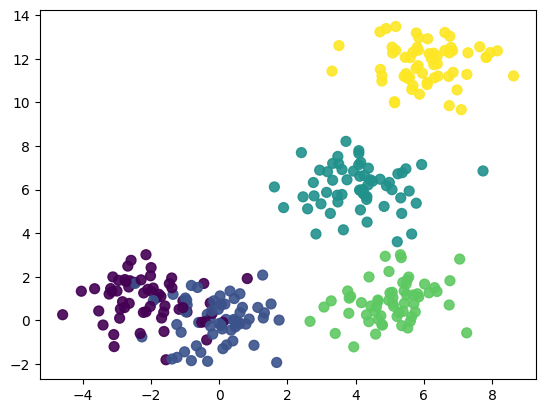

k=1   NMI = 0.0000
k=2   NMI = 0.5347
k=3   NMI = 0.7674
k=4   NMI = 0.8942
k=5   NMI = 0.8847
k=6   NMI = 0.8474
k=7   NMI = 0.8094
k=8   NMI = 0.7810
k=9   NMI = 0.7555


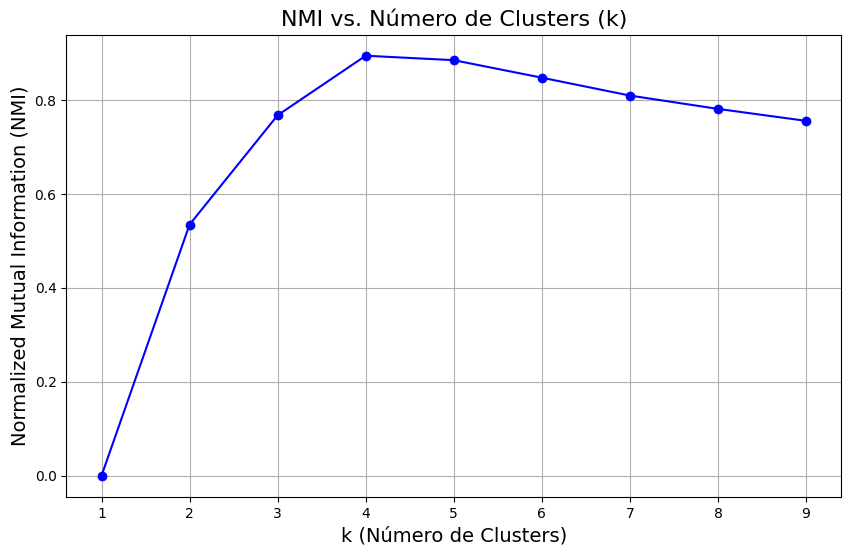

O número ideal de clusters (k) é: 4
NMI MAX = 0.8942


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(33)

# create blobs
c = [(-2,1),(0,0),(4,6),(5,1),(6,12)]
n=300
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=1, random_state=50)
X = data[0]
labels = data[1]
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

K_range = range(1, 10)
nmis = [] # Armazena os NMIS

# Itera sobre todos os valores de k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=33, n_init=5)
    y_km_pred = kmeans.fit_predict(X)

    nmi = normalized_mutual_info_score(labels, y_km_pred, average_method='arithmetic')
    nmis.append(nmi)
    
    print(f"k={k}   NMI = {nmi:.4f}")

# Cria uma nova figura para o gráfico NMI
plt.figure(figsize=(10, 6))
plt.plot(K_range, nmis, '-bo') # 'bo' = blue circles e linha
plt.xlabel('k (Número de Clusters)', fontsize=14)
plt.ylabel('Normalized Mutual Information (NMI)', fontsize=14)
plt.title('NMI vs. Número de Clusters (k)', fontsize=16)
plt.xticks(K_range) # Garante que todos os valores de k apareçam no eixo x
plt.grid(True)
plt.show()

# Encontra o valor de k que deu o maior NMI
best_k_index = np.argmax(nmis)
best_k = K_range[best_k_index]
best_nmi = nmis[best_k_index]

print(f"O número ideal de clusters (k) é: {best_k}")
print(f"NMI MAX = {best_nmi:.4f}")

### Métrica da Silhueta

Usando do dataset artificial make_circles, com diferentes números de observações (dados) repetiremos a análise feita em sala, ou seja, compararemos os métodos de agrupamento, mas dessa vez utilizando da métrica da Silhueta paraa avaliar performance dos diferentes caminhos que podemos tomar.


 Resumo dos Scores de Silhueta (Quanto maior, melhor) 

n_samples  | K-means    | Ward       | Single     | Average    | Complete  
------------------------------------------------------------------------------------------
100        | 0.347      | 0.336      | 0.102      | 0.341      | 0.342     
500        | 0.353      | 0.345      | 0.113      | 0.304      | 0.349     
1000       | 0.356      | 0.305      | 0.112      | 0.332      | 0.341     


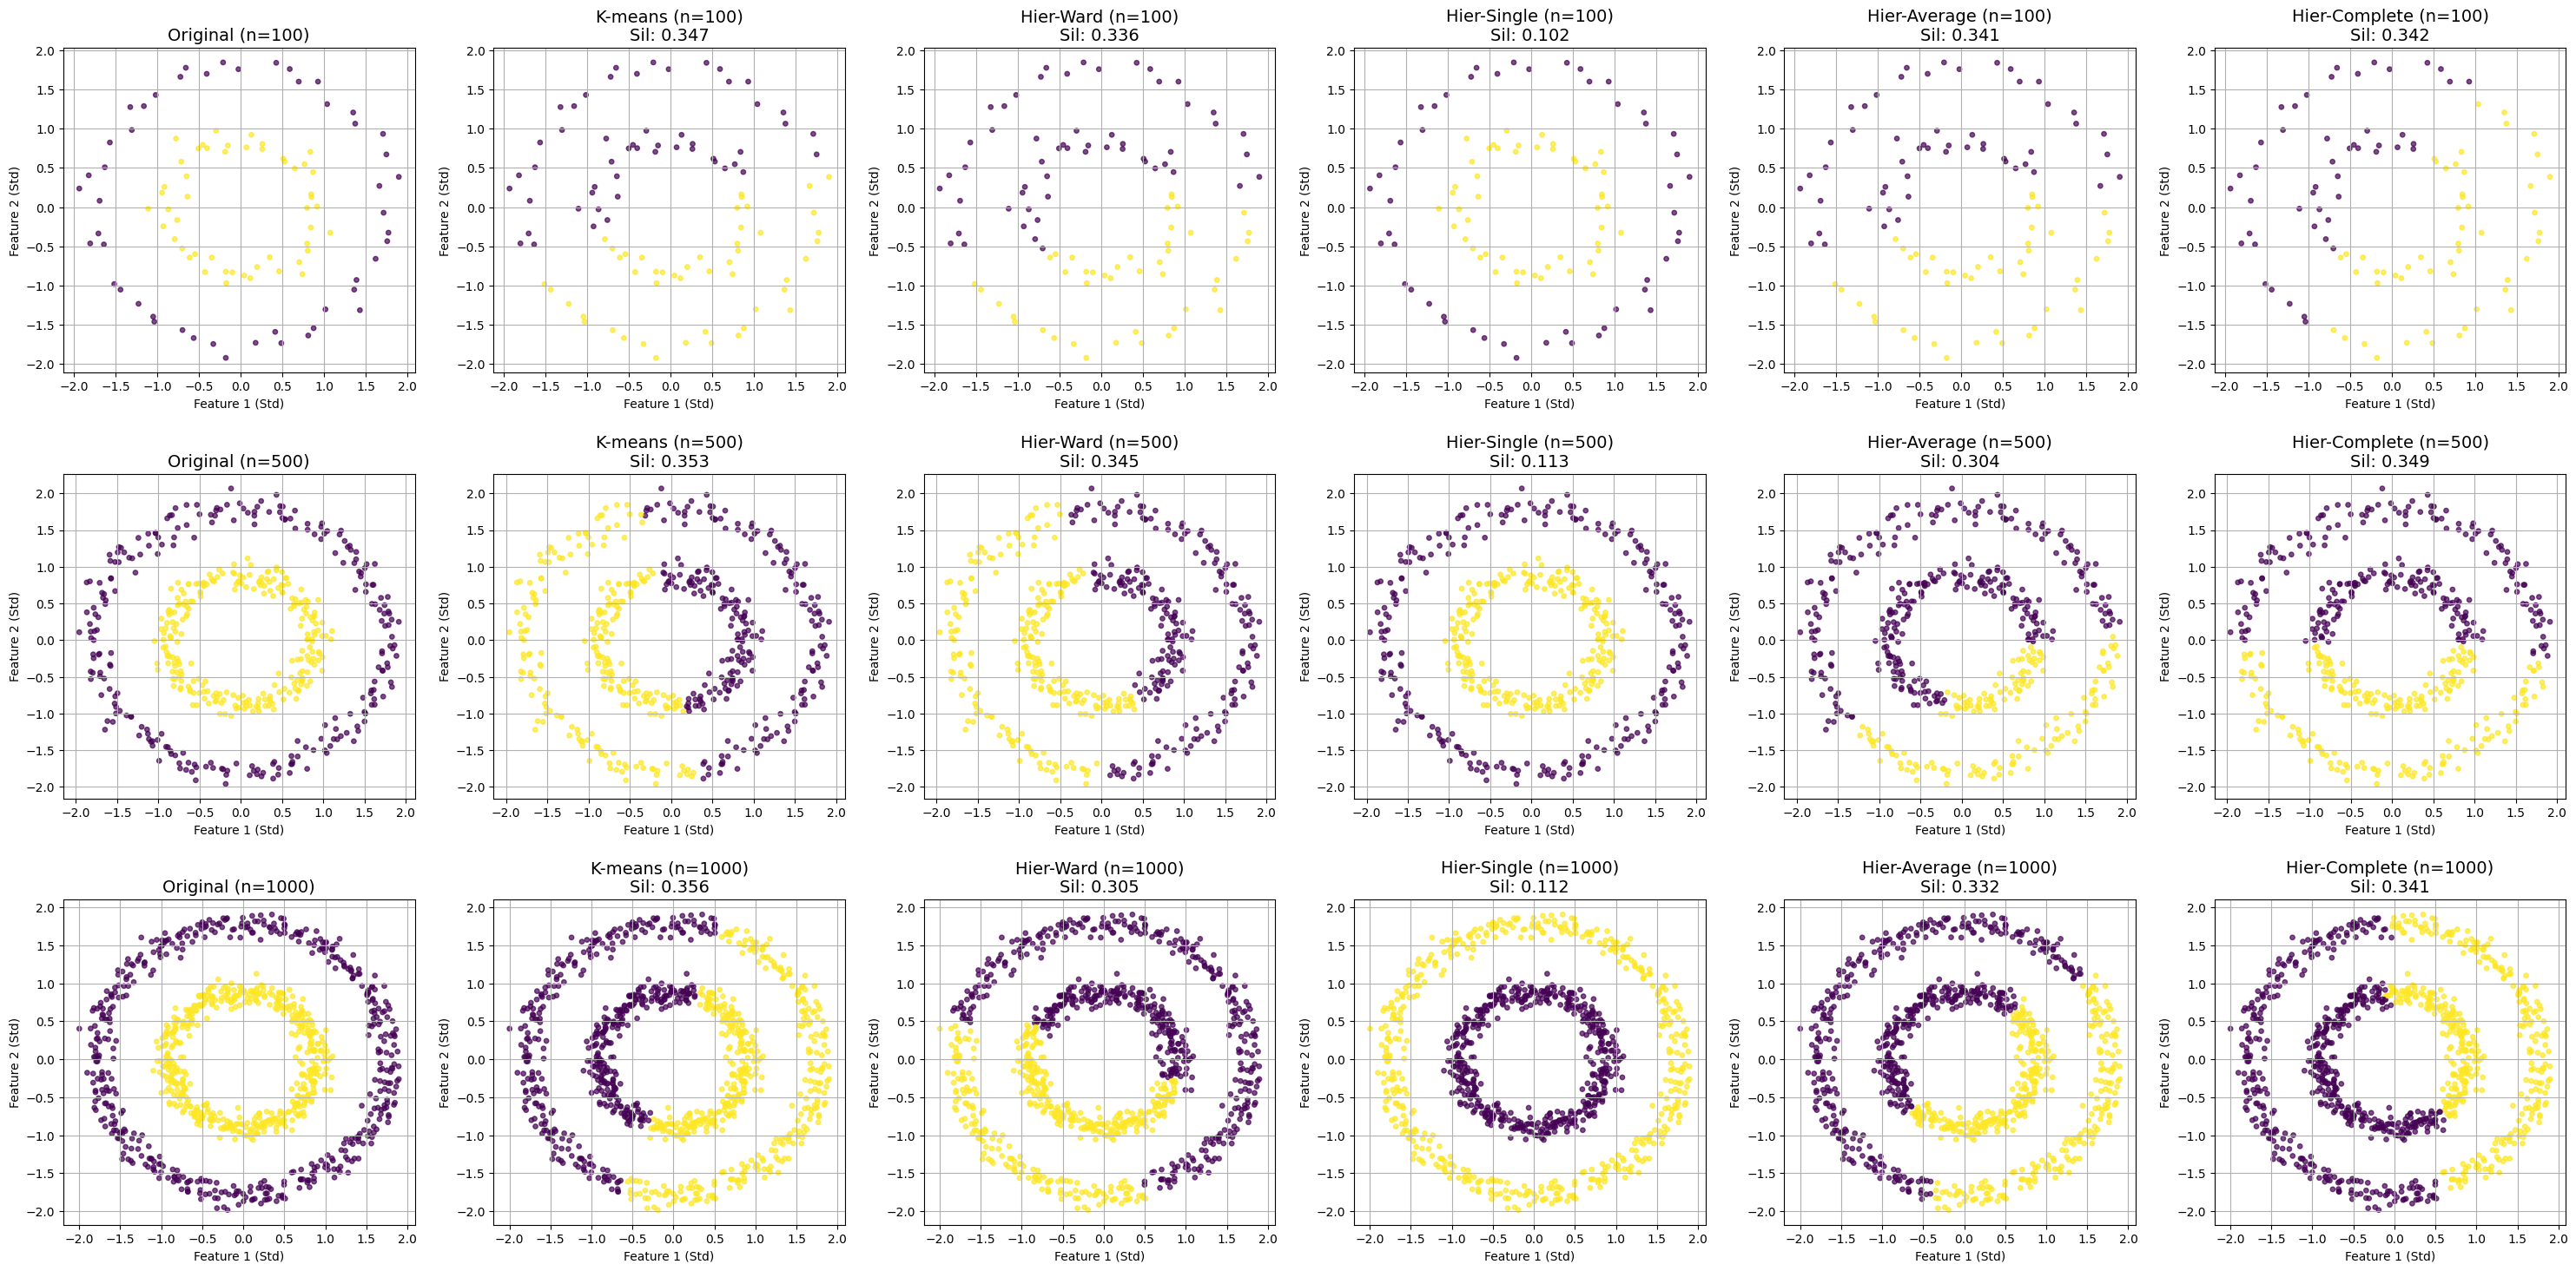

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Parâmetros
n_samples_list = [100, 500, 1000]
k = 2
noise = 0.05
factor = 0.5

# Configurar figura (agora com 6 colunas)
plt.figure(figsize=(30, len(n_samples_list) * 5))
results = []
plot_index = 1

# Loop principal
for n in n_samples_list:
    
    # Gerar e padronizar dados
    X, y_true = make_circles(n_samples=n, noise=noise, factor=factor, random_state=42)
    X_std = StandardScaler().fit_transform(X)

    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_km = kmeans.fit_predict(X_std)
    sil_km = silhouette_score(X_std, y_km, metric='euclidean')
    
    # Hierárquico Ward
    agg_ward = AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr_ward = agg_ward.fit_predict(X_std)
    sil_hr_ward = silhouette_score(X_std, y_hr_ward, metric='euclidean')

    # Hierárquico Single
    agg_single = AgglomerativeClustering(n_clusters=k, linkage='single')
    y_hr_single = agg_single.fit_predict(X_std)
    sil_hr_single = silhouette_score(X_std, y_hr_single, metric='euclidean')
    
    # Hierárquico Average
    agg_average = AgglomerativeClustering(n_clusters=k, linkage='average')
    y_hr_average = agg_average.fit_predict(X_std)
    sil_hr_average = silhouette_score(X_std, y_hr_average, metric='euclidean')
    
    # Hierárquico Complete
    agg_complete = AgglomerativeClustering(n_clusters=k, linkage='complete')
    y_hr_complete = agg_complete.fit_predict(X_std)
    sil_hr_complete = silhouette_score(X_std, y_hr_complete, metric='euclidean')
    
    # Armazenar resultados
    results.append({
        'n': n,
        'sil_km': sil_km,
        'sil_hr_ward': sil_hr_ward,
        'sil_hr_single': sil_hr_single,
        'sil_hr_average': sil_hr_average,
        'sil_hr_complete': sil_hr_complete
    })

    # Plotar resultados
    
    # Original
    plt.subplot(len(n_samples_list), 6, plot_index)
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_true, cmap='viridis', s=15, alpha=0.7)
    plt.title(f'Original (n={n})', fontsize=14)
    plt.xlabel('Feature 1 (Std)')
    plt.ylabel('Feature 2 (Std)')
    plt.grid(True)
    plot_index += 1

    # K-means
    plt.subplot(len(n_samples_list), 6, plot_index)
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_km, cmap='viridis', s=15, alpha=0.7)
    plt.title(f'K-means (n={n})\nSil: {sil_km:.3f}', fontsize=14)
    plt.xlabel('Feature 1 (Std)')
    plt.ylabel('Feature 2 (Std)')
    plt.grid(True)
    plot_index += 1

    # Hierárquico Ward
    plt.subplot(len(n_samples_list), 6, plot_index)
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_hr_ward, cmap='viridis', s=15, alpha=0.7)
    plt.title(f'Hier-Ward (n={n})\nSil: {sil_hr_ward:.3f}', fontsize=14)
    plt.xlabel('Feature 1 (Std)')
    plt.ylabel('Feature 2 (Std)')
    plt.grid(True)
    plot_index += 1
    
    # Hierárquico Single
    plt.subplot(len(n_samples_list), 6, plot_index)
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_hr_single, cmap='viridis', s=15, alpha=0.7)
    plt.title(f'Hier-Single (n={n})\nSil: {sil_hr_single:.3f}', fontsize=14)
    plt.xlabel('Feature 1 (Std)')
    plt.ylabel('Feature 2 (Std)')
    plt.grid(True)
    plot_index += 1
    
    # Hierárquico Average
    plt.subplot(len(n_samples_list), 6, plot_index)
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_hr_average, cmap='viridis', s=15, alpha=0.7)
    plt.title(f'Hier-Average (n={n})\nSil: {sil_hr_average:.3f}', fontsize=14)
    plt.xlabel('Feature 1 (Std)')
    plt.ylabel('Feature 2 (Std)')
    plt.grid(True)
    plot_index += 1
    
    # Hierárquico Complete
    plt.subplot(len(n_samples_list), 6, plot_index)
    plt.scatter(X_std[:, 0], X_std[:, 1], c=y_hr_complete, cmap='viridis', s=15, alpha=0.7)
    plt.title(f'Hier-Complete (n={n})\nSil: {sil_hr_complete:.3f}', fontsize=14)
    plt.xlabel('Feature 1 (Std)')
    plt.ylabel('Feature 2 (Std)')
    plt.grid(True)
    plot_index += 1

plt.tight_layout(pad=2.0)

# Resumo
print("\n Silhouette Scores: \n")
print(f"{'n_samples':<10} | {'K-means':<10} | {'Ward':<10} | {'Single':<10} | {'Average':<10} | {'Complete':<10}")
print("-" * 90)
for res in results:
    print(f"{res['n']:<10} | {res['sil_km']:<10.3f} | {res['sil_hr_ward']:<10.3f} | {res['sil_hr_single']:<10.3f} | {res['sil_hr_average']:<10.3f} | {res['sil_hr_complete']:<10.3f}")

### Análise final

Podemos perceber que clustering é um método de classificação extremamente interessante quando trataamos de problemas multi-classe ou com padrões que necessitariam uma análise gráfica para faze-lo, enquanto as métricas, como a silhueta e NMI fazem o trabalho de ajustá-los e garantir uma boa performance dos modelos de classificação, sem causar overfitting, mostrando sua importância nesses casos.